# 1. Data Exploration

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

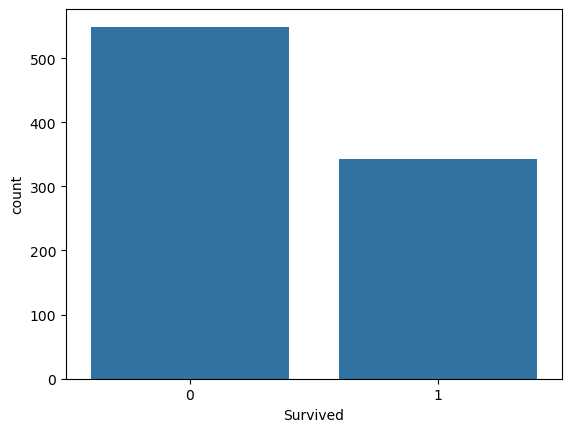

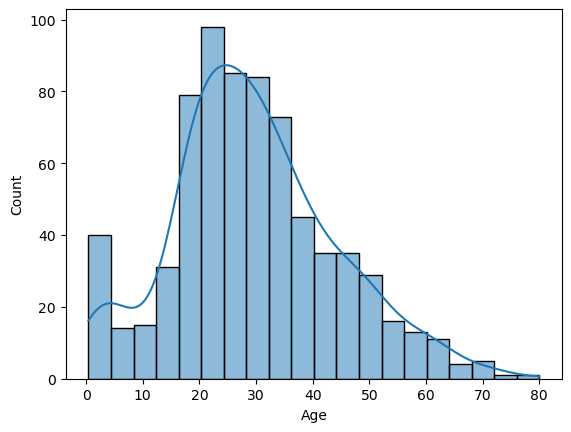

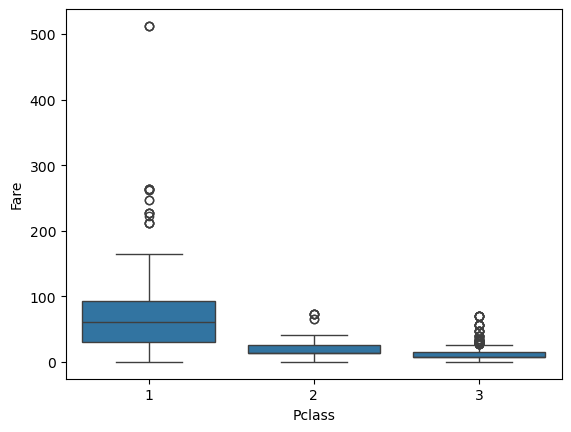

In [8]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
file_path = 'C:/Users/Me/Downloads/titanic.csv'  # Update this with the actual path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Basic data exploration
print(df.info())
print(df.describe())

# Visualize the distribution of some features
sns.countplot(x='Survived', data=df)
plt.show()

sns.histplot(df['Age'].dropna(), kde=True)
plt.show()

sns.boxplot(x='Pclass', y='Fare', data=df)
plt.show()

# 2. Feature Creation

In [9]:
# Create a new feature FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a new binary feature IsAlone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Display the updated DataFrame
print("First few rows with new features:")
print(df[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head())

First few rows with new features:
   SibSp  Parch  FamilySize  IsAlone
0      1      0           2        0
1      1      0           2        0
2      0      0           1        1
3      1      0           2        0
4      0      0           1        1


# 3. Feature Transformation

In [10]:
# Convert Fare to a categorical feature
df['FareCategory'] = pd.qcut(df['Fare'], 3, labels=['Low', 'Medium', 'High'])

# Extract Title from Name
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Display the first few rows with the transformed features
print("First few rows with transformed features:")
print(df[['Fare', 'FareCategory', 'Name', 'Title']].head())

First few rows with transformed features:
      Fare FareCategory                                               Name  \
0   7.2500          Low                            Braund, Mr. Owen Harris   
1  71.2833         High  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2   7.9250          Low                             Heikkinen, Miss. Laina   
3  53.1000         High       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4   8.0500          Low                           Allen, Mr. William Henry   

  Title  
0    Mr  
1   Mrs  
2  Miss  
3   Mrs  
4    Mr  


# 4. Handling Missing Values

In [11]:
# Impute missing values in Age with the median value
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing values in Embarked with the most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify that there are no more missing values
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
FamilySize        0
IsAlone           0
FareCategory      0
Title             0
dtype: int64


# 5. Model Training and Evaluation

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare the data for modeling
features_original = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
features_transformed = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'FareCategory', 'Title']]
target = df['Survived']

# Encode categorical variables
features_original = pd.get_dummies(features_original, columns=['Sex'], drop_first=True)
features_transformed = pd.get_dummies(features_transformed, columns=['Sex', 'FareCategory', 'Title'], drop_first=True)

# Handle missing values in features_transformed
features_transformed = features_transformed.fillna(0)

# Split the data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(features_original, target, test_size=0.2, random_state=42)
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(features_transformed, target, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_orig = scaler.fit_transform(X_train_orig)
X_test_orig = scaler.transform(X_test_orig)
X_train_trans = scaler.fit_transform(X_train_trans)
X_test_trans = scaler.transform(X_test_trans)

# Train logistic regression models with increased iterations
model_orig = LogisticRegression(max_iter=500)
model_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = model_orig.predict(X_test_orig)

model_trans = LogisticRegression(max_iter=500)
model_trans.fit(X_train_trans, y_train_trans)
y_pred_trans = model_trans.predict(X_test_trans)

# Evaluate the models
metrics = {
    'Original Features': {
        'Accuracy': accuracy_score(y_test_orig, y_pred_orig),
        'Precision': precision_score(y_test_orig, y_pred_orig),
        'Recall': recall_score(y_test_orig, y_pred_orig),
        'F1 Score': f1_score(y_test_orig, y_pred_orig)
    },
    'Transformed Features': {
        'Accuracy': accuracy_score(y_test_trans, y_pred_trans),
        'Precision': precision_score(y_test_trans, y_pred_trans),
        'Recall': recall_score(y_test_trans, y_pred_trans),
        'F1 Score': f1_score(y_test_trans, y_pred_trans)
    }
}

print("Evaluation Metrics for Original Features:")
print(f"Accuracy: {metrics['Original Features']['Accuracy']:.4f}")
print(f"Precision: {metrics['Original Features']['Precision']:.4f}")
print(f"Recall: {metrics['Original Features']['Recall']:.4f}")
print(f"F1 Score: {metrics['Original Features']['F1 Score']:.4f}")

print("\nEvaluation Metrics for Transformed Features:")
print(f"Accuracy: {metrics['Transformed Features']['Accuracy']:.4f}")
print(f"Precision: {metrics['Transformed Features']['Precision']:.4f}")
print(f"Recall: {metrics['Transformed Features']['Recall']:.4f}")
print(f"F1 Score: {metrics['Transformed Features']['F1 Score']:.4f}")

Evaluation Metrics for Original Features:
Accuracy: 0.7989
Precision: 0.7794
Recall: 0.7162
F1 Score: 0.7465

Evaluation Metrics for Transformed Features:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639
